# Decision Tree
- Anime dataset
- Perform a Decision Tree Classifier weather "to watch" or "not to watch" an anime titles based on my preferences.

### Loading Dataset 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Anime.csv")
print(df.shape)
df.head(1)

(18495, 17)


,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.6,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."


### Cleaning Datasets
We will focus on EDA for this activity, so we will select interesting columns and drop null values here.

In [3]:
# select only the interesting columns
df1 = df[['Rank', 'Name', 'Type', 'Episodes', 'Rating', 'Content_Warning']]
# clear white spaces in 'Type' column
df1['Type'] = df1['Type'].str.replace(" ", "")
# drop null values
df1 = df1.dropna()
print(df1.shape)
df1.head(3)

(1296, 6)


,Rank,Name,Type,Episodes,Rating,Content_Warning
1,2,Fruits Basket the Final Season,TV,13.0,4.60,"Emotional Abuse,, Mature Themes,, Physical Abu..."
3,4,Fullmetal Alchemist: Brotherhood,TV,64.0,4.58,"Animal Abuse,, Mature Themes,, Violence,, Dome..."
4,5,Attack on Titan 3rd Season: Part II,TV,10.0,4.57,"Cannibalism,, Explicit Violence"


### Creating Decision Tree
NOTE: The decision tree does not support categorical data as features.

As a first step, we will create a binary class (0 = not to watch, 1 = to watch) from the rating. Rating score  equal or greater than "3" we will consider as "to watch".


### Criteria for "to watch" or "not to watch"

In [6]:
# Criteria for "to watch" or "not to watch" in a new column name 'Judgement'
df1['Judgement'] = (df1['Rating']>= 3) & (df1['Type']== 'TV') & (df1['Episodes'] >=10) & (df1['Content_Warning']== 'Violence') 
# convert 'Judgement' column into 0 and 1
df1['Judgement'] = df1['Judgement'].astype('int')
# verify
print(df1.Judgement.value_counts())
df1.head(2)

0    1083
1     213
Name: Judgement, dtype: int64


,Rank,Name,Type,Episodes,Rating,Content_Warning,Judgement
1,2,Fruits Basket the Final Season,TV,13.0,4.60,"Emotional Abuse,, Mature Themes,, Physical Abu...",0
3,4,Fullmetal Alchemist: Brotherhood,TV,64.0,4.58,"Animal Abuse,, Mature Themes,, Violence,, Dome...",0


#### Define X and y

In [7]:
X = df1[['Rating', 'Type','Episodes', 'Content_Warning']]
y = df1['Judgement']
y = y.astype('int')

### X dataset Manipulation

Manipulation of "Type" column

In [8]:
# convert to OHE
pd.get_dummies(X, columns=['Type']).head(2)

,Rating,Episodes,Content_Warning,Type_OVA,Type_TV,Type_Web
1,4.60,13.0,"Emotional Abuse,, Mature Themes,, Physical Abu...",0,1,0
3,4.58,64.0,"Animal Abuse,, Mature Themes,, Violence,, Dome...",0,1,0


In [9]:
X_encoded = pd.get_dummies(X, columns=['Type'])
X_encoded.head(2)

,Rating,Episodes,Content_Warning,Type_OVA,Type_TV,Type_Web
1,4.60,13.0,"Emotional Abuse,, Mature Themes,, Physical Abu...",0,1,0
3,4.58,64.0,"Animal Abuse,, Mature Themes,, Violence,, Dome...",0,1,0


Manipulation of "Content_Warning" column
<br/>
Create new column named "Genre" that has a value of 1 if the genre of the observation is "Violence" type otherwise 0.

In [10]:
for i in X_encoded['Content_Warning']:
    if i == 'Violence':
        X_encoded['Genre'] = X_encoded['Content_Warning'].map({'Violence':1})
    
# convert Nan into 0's
X_encoded['Genre'].fillna(0, inplace=True)  

Finalize the new X dataset in a new variable named "X_encoded"

In [11]:
X_encoded = X_encoded[['Rating','Type_OVA','Type_TV','Type_Web','Episodes', 'Genre']]
X_encoded.head(2)

,Rating,Type_OVA,Type_TV,Type_Web,Episodes,Genre
1,4.60,0,1,0,13.0,0.0
3,4.58,0,1,0,64.0,0.0


### Data split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X_encoded,y, random_state=0, test_size=0.3)

### `Note:`
</br>
In most decision tree, we are just comparing stuff and branching down the tree, so normalization would not help here.

### Decision Tree Instance

In [13]:
# parameters are all on default 
dt = DecisionTreeClassifier(random_state=0, 
#                             max_depth=3,
                           )
# Fit training data
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

### Visualize Decision Tree

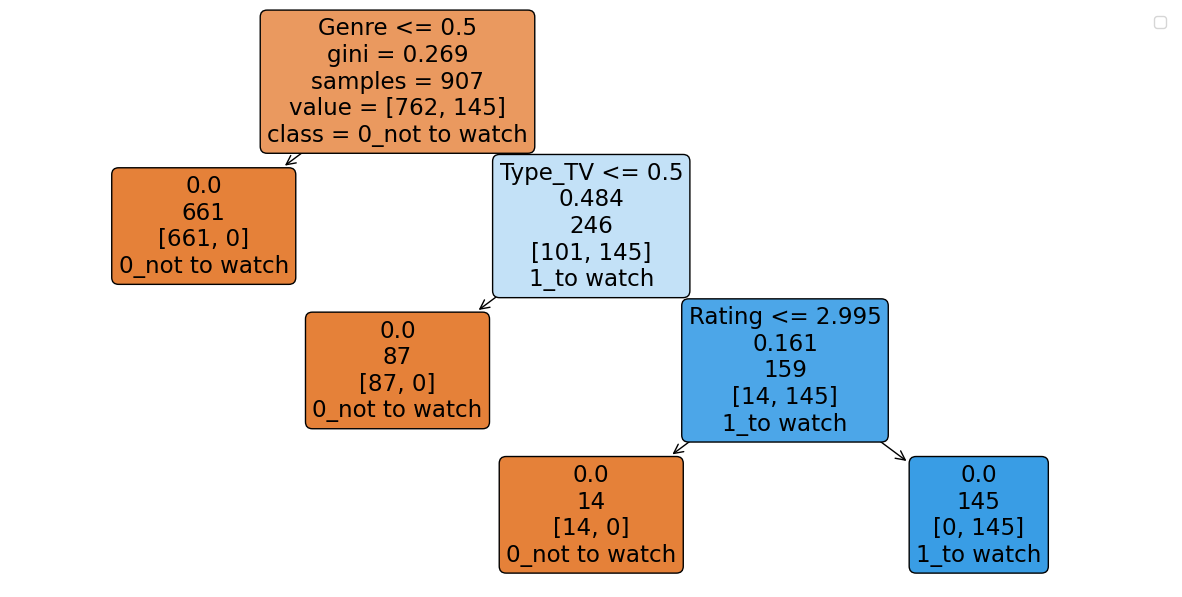

In [14]:
plt.figure(figsize=(15, 7.5))

tree.plot_tree(dt, 
               feature_names = x_train.columns,
               max_depth=None,
               class_names = ['0_not to watch', '1_to watch'],
               label='root',
               filled=True,
               rounded = True
              )
plt.legend('kkddd')
plt.show()

### `Interpretation`
1. `Genre` / Root Node 
 - Genre has the lowest GNI impurity thats why it became our root node.
 - If "Genre" is not "Violence" then it will fall to "not to watch" node.
 - There are 907 total samples (X data after the split)
 - There are 762 observations fall under not to watch node and a 145 observations that is a "Violence" genre type (to watch).
 - Class is 0_not_to_watch, majority of the observations is not a "Violence" or has many genre type.


2. Type_TV
 - If the observation is a "Violence" type, then it will fall under the second layer node "Type_TV"
 - If the observation is a "TV" type then it will consider as "to watch".


3. Rating
 - If the observation has a rating equal or higher than 2.995 then it will fall under "to watch" category.

# Model Evaluation

In [15]:
y_pred = dt.predict(x_test)
# print(dt.score(x_test, y_test)) # .score is the same as accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


[[321   0]
 [  0  68]]


<AxesSubplot:>

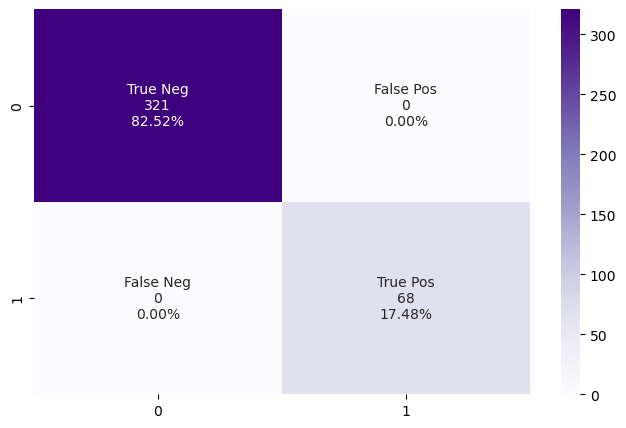

In [16]:
# Confusion Matrix
model_matrix = confusion_matrix(y_test, y_pred)
print(model_matrix)

# Visualize
fig, ax = plt.subplots(figsize=(8,5))

# setting variables
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in model_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in model_matrix.flatten()/np.sum(model_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(model_matrix, annot=labels, fmt='', cmap='Purples')

# code using plot_confusion_matrix
# uncomment to show
# plot_confusion_matrix(dt, x_test, y_test, display_labels =['Unlikely Admit', 'Likely Admit'], cmap='Purples')

### Testing our model

In [17]:
# input Rating/Type_OVA/Type_TV/Type_Web/Episodes/Genre
new_anime1 = [[4,0,1,0,12,1]]

In [18]:
# predict new_anime1
dt.predict(new_anime1)

array([1])

new_anime1 is a must watch TV series.

***

***